In [1]:
import pytesseract
import cv2
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
# img = cv2.imread(r"C:\Users\muthu\OneDrive\Pictures\Camera Roll\WIN_20240902_15_18_08_Pro.jpg")
img = cv2.imread(r'C:\Users\muthu\Documents\bill_ocr\60c4199364474569561cba359d486e6c69ae8cba.jpeg')

In [61]:
# img= img[100:900, 100:900]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
# blur = cv2.medianBlur(gray,11)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,2)
# thresh = cv2.threshold(blur, 128,255,cv2.THRESH_BINARY)[1]

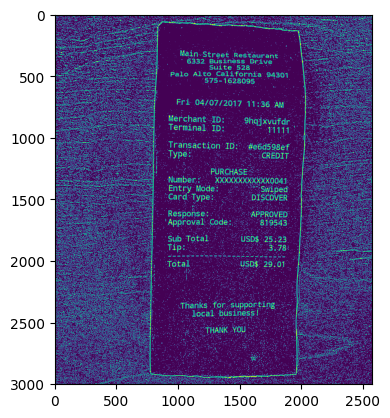

In [62]:
plt.imshow(thresh)
plt.show()

51151


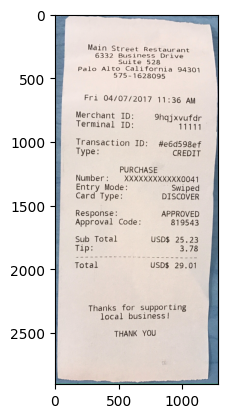

In [64]:
result = img.copy()
canny = cv2.Canny(blur, 10, 100)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
sort = sorted(contours, key=lambda x: cv2.contourArea(x))
# count = 0
x,y,w,h = cv2.boundingRect(sort[len(contours)-1])
cv2.rectangle(result, (x,y), (x+w, y+h), (0,255,0),2)
result = result[y:y+h, x:x+w]
# print(sort)
# for cont in sort:
#     x,y,w,h = cv2.boundingRect(cont)
#     cv2.rectangle(result, (x,y), (x+w, y+h), (0,0,255),2)
    # count = count+1
plt.imshow(result)
plt.show()

In [78]:
print(count)

634


In [13]:
for item in sort:
    print(cv2.contourArea(item))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
5.0
7.5
7721508.0


In [3]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [67]:
print(pytesseract.image_to_string(result))

In [107]:
flag = 'kaufland'

In [108]:
text = pytesseract.image_to_string(result)
text = text.split()
if flag == 'kaufland':

    for index, i in enumerate(text):
        # print(i)
        

        if i == 'Summe':
            print(i)
            break
    # print(text[index+1])
    
# print(index,i)
        

# print(text[index])

In [4]:
df = pd.DataFrame(columns=['Contributor','Shop','Date', 'Cost'])
centers = ['Kaufland', 'TEDI', 'LiDL']

In [23]:
cap = cv2.VideoCapture(1)
i = 0
flag = 'kaufland'
while True:
    i=i+1
    ret, frame = cap.read()
    
    cv2.imshow("frame", frame)
    # if i>100:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
    result = frame.copy()
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # print(len(contours))
    sort = sorted(contours, key=lambda x: cv2.contourArea(x))
    x,y,w,h = cv2.boundingRect(sort[len(contours)-1])
    cv2.rectangle(result, (x,y), (x+w, y+h), (0,0,255),2)
    result = result[y:y+h, x:x+w]
    text = pytesseract.image_to_string(result)
    text = text.split()
    # print(text)
    
    # if flag == 'kaufland':
    for i in range(len(text)):
        
        if text[i] in centers:
            shop = text[i]
        # else:
        #     shop = "not found"
    

        if text[i] == 'Summe':
        # print(text[i+1])
            num = text[i+1]
        # else:
        #     num = "not found"
    
    
        if text[i] == 'Datum':
            date = text[i+1]
        # else:
        #     date = "not found"
        
    
        

    #         # print(i)
            

    #         if i == 'Summe':
    #             print(i)
    #             break
    # print(text[index+1])
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
contributor = 'Muthu'

Shop = shop
date = date
cost = num

df.loc[len(df)] = [contributor, Shop, date, cost]
print(df)

  Contributor       Shop       Date       Cost
0       Muthu  not found  not found  not found
1       Muthu   Kaufland  not found  not found
2       Muthu  not found  not found  not found
3       Muthu  not found  not found  not found
4       Muthu  not found  not found  not found
5       Muthu   Kaufland         00  not found
6       Muthu   Kaufland  :03.12.23  not found
7       Muthu   Kaufland  :03.12.23  not found
8       Muthu   Kaufland  :03.12.23  not found
9       Muthu   Kaufland  :03.12.23       0/99


In [9]:
shop

'Kaufland'

In [24]:
text

['Knoblauch',
 'Sauce',
 'Gr',
 'Bolen',
 '|',
 'extra',
 'fein',
 'Ri',
 '{nisTomatens:',
 'Pr',
 'Riegel',
 'aN',
 '2,44',
 'x',
 '2',
 'Torta',
 'Wraps.',
 'XXL',
 'zu',
 'zahlets',
 'Karte',
 'os',
 'wy',
 'Qn!',
 '\\',
 'Sime',
 'dir',
 'di',
 'ie,',
 'A',
 'Hind',
 'spare',
 'ote',
 'Liat',
 'i',
 '“inet',
 'Ka',
 'ane',
 'SES',
 'GOEKT',
 'Vina',
 'ik',
 'Wand']

In [15]:
df.to_csv('sheet.csv')

In [36]:
a = 'Kaufland'
if a in centers:
    print(a)

Kaufland


In [13]:
df

,Contributor,Shop,Date,Cost


In [24]:
contributor = 'hi'
Shop = 'kaufland'
date = '31/08/2024'
cost = num

In [22]:
# df = df.concat([df, pd.DataFrame({'Contributor': contributor , 'Shop': Shop, 'Date': date, 'Cost': num})], ignore_index = True)
# print(df)


  Contributor      Shop        Date  Cost
0       Muthu  kaufland  31/08/2024  3,90


In [23]:
df

,Contributor,Shop,Date,Cost
0,Muthu,kaufland,31/08/2024,"3,90"


In [25]:
df.loc[len(df)] = [contributor, Shop, date, cost]
print(df)

  Contributor      Shop        Date  Cost
0       Muthu  kaufland  31/08/2024  3,90
1          hi  kaufland  31/08/2024  3,90
